In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_df = pd.read_csv("C:/Users/heman/Downloads/startup_funding.csv")

In [3]:
raw_df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2080 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


 ### We need to fix  the dtype to datetime of data column for year extraction before that we will change column names

In [5]:
raw_df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [6]:
raw_df.columns=['sr','date','startup_name','sector','sub_sector','city','investor','investment_type','amount_usd']

In [7]:
raw_df.columns

Index(['sr', 'date', 'startup_name', 'sector', 'sub_sector', 'city',
       'investor', 'investment_type', 'amount_usd'],
      dtype='object')

In [8]:
df=raw_df.copy()

In [9]:
df

,sr,date,startup_name,sector,sub_sector,city,investor,investment_type,amount_usd
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3039,3040,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3040,3041,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3041,3042,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"
3042,3043,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN


> ### We need to date column to datetime format from object because we need year for analysis

In [10]:
df['date']=df['date'].str.replace('05/072018','05-07-2018')

In [11]:
df['date']=pd.to_datetime(df['date'],errors='coerce') ## errors = 'coerce' will avoid the errors

In [12]:
df=df.fillna({
    'startup_name':'unknown',
    'sector':'unknown',
    'sub_sector':'unknown',
    'city':'India',
    'investor':'hidden',
    'investment_type':'unknown',
    'amount_usd':'0'
    
})

In [13]:
df.amount_usd.isnull().sum()

0

> ### Now lets change the datatype of amount_usd column for further stat calculations 
> We need to remove commas from amounts to convert it into floats

In [14]:
df['amount_usd']=df.amount_usd.str.replace(',','').str.replace('+','').astype(float) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sr               3044 non-null   int64         
 1   date             3042 non-null   datetime64[ns]
 2   startup_name     3044 non-null   object        
 3   sector           3044 non-null   object        
 4   sub_sector       3044 non-null   object        
 5   city             3044 non-null   object        
 6   investor         3044 non-null   object        
 7   investment_type  3044 non-null   object        
 8   amount_usd       3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


# Exploaratory Analysis And Visualisation
> ## here we will make some computations like sum,cumsum,and mean 

In [16]:
## we will add new year column to our dataset df
df['year'] = pd.DatetimeIndex(df.date).year

In [17]:
df

,sr,date,startup_name,sector,sub_sector,city,investor,investment_type,amount_usd,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020.0
3,4,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020.0
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,India,Asia Pacific Internet Group,Private Equity,4500000.0,2015.0
3040,3041,2015-01-29,Graphene,unknown,unknown,India,KARSEMVEN Fund,Private Equity,825000.0,2015.0
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,India,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,2015.0
3042,3043,2015-01-30,Simplotel,unknown,unknown,India,MakeMyTrip,Private Equity,0.0,2015.0


In [18]:
df['year']=df.year.fillna(2018) ## filled two error years with mean year

In [19]:
df['year']=df.year.astype(int)

In [20]:
df

,sr,date,startup_name,sector,sub_sector,city,investor,investment_type,amount_usd,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020
3,4,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,India,Asia Pacific Internet Group,Private Equity,4500000.0,2015
3040,3041,2015-01-29,Graphene,unknown,unknown,India,KARSEMVEN Fund,Private Equity,825000.0,2015
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,India,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,2015
3042,3043,2015-01-30,Simplotel,unknown,unknown,India,MakeMyTrip,Private Equity,0.0,2015


> ## Now amount_usd cannot be zero so lets replace 0 with mean values

In [21]:
df.amount_usd=df.amount_usd.fillna(0)
df.amount_usd.isna().sum()

0

In [22]:
mean=df.amount_usd.mean()

In [23]:
## enumerate fun for finding index at which amount is zero
for i,item in enumerate(df.amount_usd):
    if(item==0):
        df['amount_usd'][i]=mean

<ipython-input-23-7a56149388dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_usd'][i]=mean


In [24]:
df

,sr,date,startup_name,sector,sub_sector,city,investor,investment_type,amount_usd,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2.000000e+08,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8.048394e+06,2020
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1.835886e+07,2020
3,4,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3.000000e+06,2020
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1.800000e+06,2020
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,unknown,unknown,India,Asia Pacific Internet Group,Private Equity,4.500000e+06,2015
3040,3041,2015-01-29,Graphene,unknown,unknown,India,KARSEMVEN Fund,Private Equity,8.250000e+05,2015
3041,3042,2015-01-30,Mad Street Den,unknown,unknown,India,"Exfinity Fund, GrowX Ventures.",Private Equity,1.500000e+06,2015
3042,3043,2015-01-30,Simplotel,unknown,unknown,India,MakeMyTrip,Private Equity,1.253085e+07,2015


In [25]:
(df.amount_usd==0).sum()  ## zero values are replaced

0

In [26]:
df.amount_usd.isna().sum()

0

In [27]:
total_funding = df.amount_usd.sum()
total_funding

50311372595.21791

>### Now lets do some visualisations by finding top 10 startups ,yearwise funding and sectors

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [29]:
df['startup_name']= df['startup_name'].str.replace('Flipkart.com','Flipkart')
df.loc[2648]

sr                                                     2649
date                                    2015-07-28 00:00:00
startup_name                                       Flipkart
sector                                   Online Marketplace
sub_sector                                          unknown
city                                              Bangalore
investor           Steadview Capital and existing investors
investment_type                              Private Equity
amount_usd                                            7e+08
year                                                   2015
Name: 2648, dtype: object

In [30]:
top_10=df[['startup_name','amount_usd']].sort_values(by='amount_usd',ascending=False).head(10)
top_10

,startup_name,amount_usd
60,Rapido Bike Taxi,3.900000e+09
651,Flipkart,2.500000e+09
966,Flipkart,1.400000e+09
830,Paytm,1.400000e+09
31,Paytm,1.000000e+09
2648,Flipkart,7.000000e+08
2459,Paytm,6.800000e+08
188,True North,6.000000e+08
33,Udaan,5.850000e+08
2470,Snapdeal,5.000000e+08


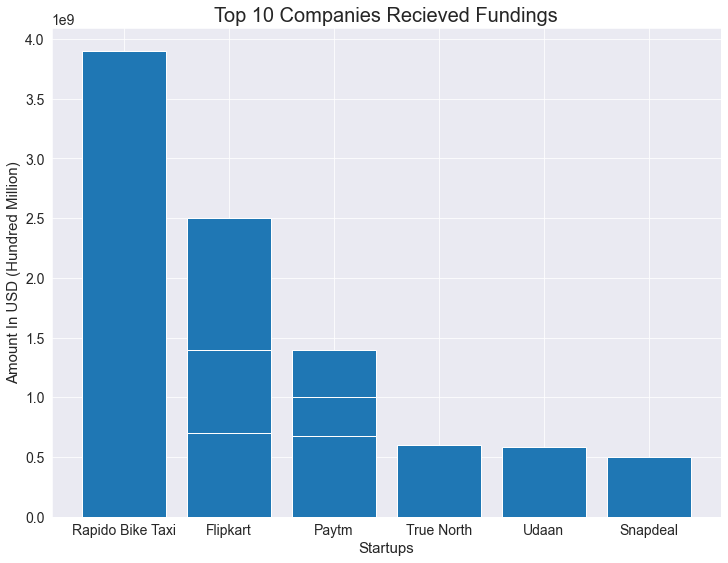

In [31]:
plt.figure(figsize=(12,9))
plt.title('Top 10 Companies Recieved Fundings',fontsize=20)
plt.xlabel('Startups',fontsize=15)
plt.ylabel('Amount In USD (Hundred Million)',fontsize=15)
plt.bar(top_10.startup_name,top_10.amount_usd);

> **Here for flipkart and paytm it is showing white lines because they got funding multiple times so they are stacked   together **

###  What is the trend of fundings?

In [32]:
df['amount_usd'].isnull().sum()

0

In [33]:
year_df=df.groupby(by='year').count()
year_df['sr']

year
2015    934
2016    993
2017    687
2018    312
2019    111
2020      7
Name: sr, dtype: int64

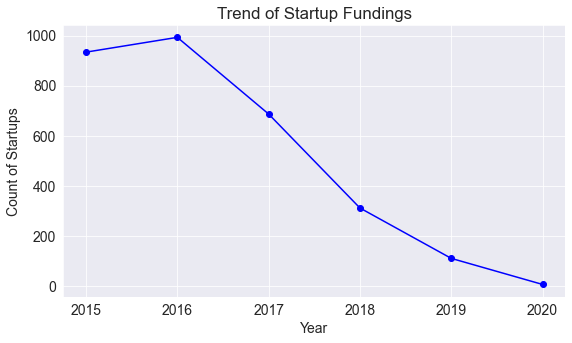

In [34]:
plt.title('Trend of Startup Fundings')
plt.xlabel('Year')
plt.ylabel('Count of Startups')
plt.plot(year_df.index,year_df.sr,'o-b');
#sns.lineplot(x=year_df.index,y=year_df.sr);

> **As we can see through the years the fundings for  the  startups is decreasing which is not so good**

### yearwise amount of startup fundings

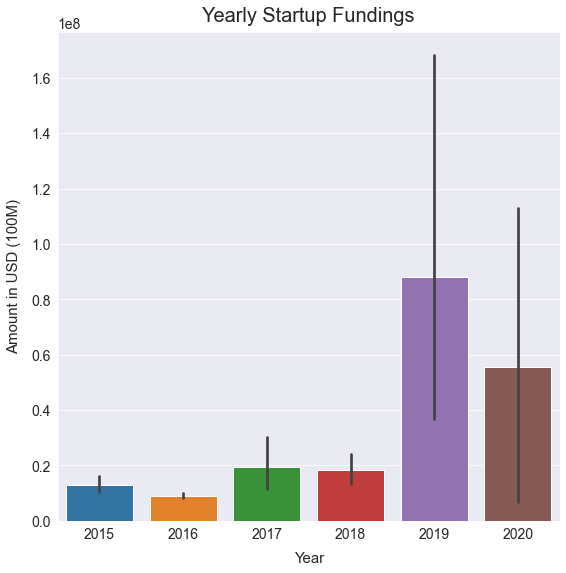

In [35]:
plt.figure(figsize=(9,9))
plt.title('Yearly Startup Fundings',pad=10,fontsize=20)
plt.xlabel('Year',labelpad=10,fontsize=15)
plt.ylabel('Count of Startups',labelpad=10,fontsize=15)
ax=sns.barplot(x=df.year,y=df.amount_usd)
ax.set(xlabel="Year", ylabel = "Amount in USD (100M)");

> **As per previous graph stats the startup fundings decreased over the years but here we can see that the ones who have got the fundings got large amount of fundings(volume)**

###  Top Startups that recieved great fundings

In [37]:
top_10.groupby('startup_name')
top_10.amount_usd

60      3.900000e+09
651     2.500000e+09
966     1.400000e+09
830     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2470    5.000000e+08
Name: amount_usd, dtype: float64

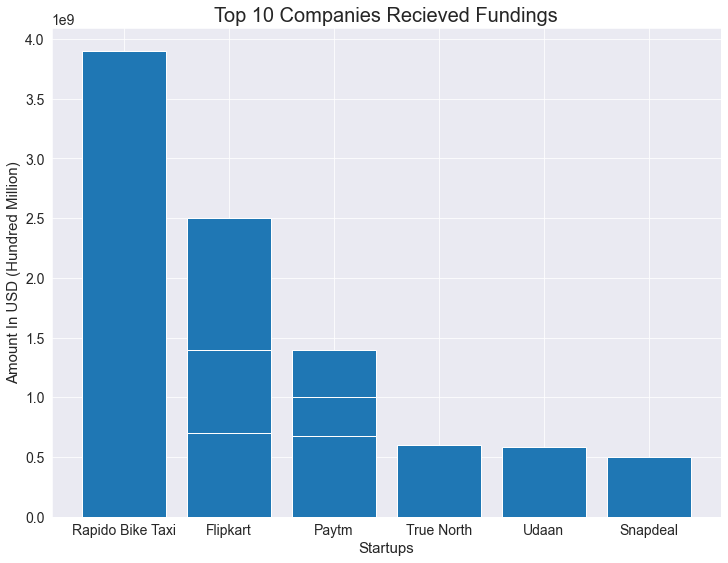

In [38]:
plt.figure(figsize=(12,9))
plt.title('Top 10 Companies Recieved Fundings',fontsize=20)
plt.xlabel('Startups',fontsize=15)
plt.ylabel('Amount In USD (Hundred Million)',fontsize=15)
plt.bar(top_10.startup_name,top_10.amount_usd);

###  Which type got more fundings?

In [39]:
sector_df=df.sector[df.sector != 'unknown'].value_counts().head(7)

In [40]:
sector_df

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
Name: sector, dtype: int64

In [41]:
df[df.sector=='Consumer Internet']

,sr,date,startup_name,sector,sub_sector,city,investor,investment_type,amount_usd,year
151,152,2018-01-09,Netmeds,Consumer Internet,Online Pharmacy Chain,Chennai,"Sistema Asia Fund, Sistema JSFC and Tanncam In...",Private Equity,3.500000e+07,2018
153,154,2018-03-09,Daily hunt,Consumer Internet,News and ebooks Mobile App,Bengaluru,Falcon Edge,Private Equity,6.390000e+06,2018
155,156,2018-04-09,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and C...",Private Equity,1.253085e+07,2018
156,157,2018-05-09,Nykaa,Consumer Internet,Online Marketplace For Multi-brand Beauty Cosm...,Mumbai,Lighthouse,Private Equity,1.572000e+08,2018
158,159,2018-06-09,Dream11,Consumer Internet,Online Gaming Platform,Mumbai,"Tencent, Kalaari Capital and Private equity fi...",Private Equity,1.000000e+08,2018
...,...,...,...,...,...,...,...,...,...,...
2100,2101,2016-01-29,Aisle,Consumer Internet,Indians focused Matchmaking App,Bangalore,"TermSheet, ah! Ventures",Seed Funding,1.850000e+05,2016
2101,2102,2016-01-29,FreshMenu,Consumer Internet,Fresh Food Delivery platform,Bangalore,"Zodius Technology Fund, Lightspeed Venture Par...",Private Equity,1.700000e+07,2016
2104,2105,2016-01-29,TinMen,Consumer Internet,Food Delivery Platform,Hyderabad,Lead Angel Network,Seed Funding,1.253085e+07,2016
2106,2107,2016-01-30,FindUrClass,Consumer Internet,Hobby & Activity Class Aggregator,Mumbai,"Amit Patni, Anirudh Damani, Samir Shah",Seed Funding,1.253085e+07,2016


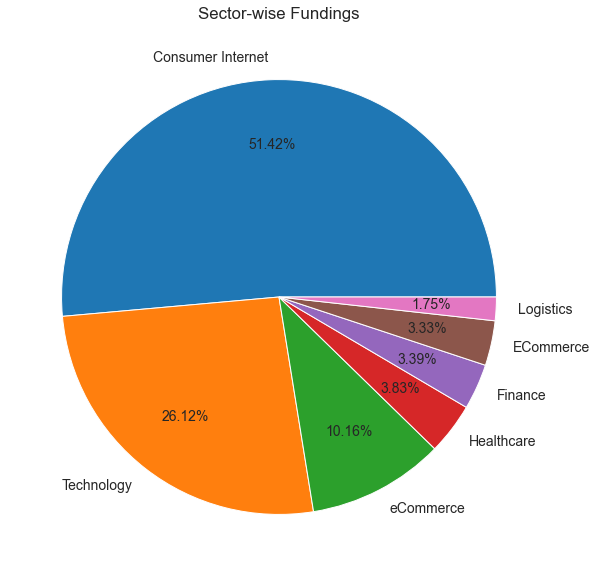

In [42]:

plt.figure(figsize=(10,10))
plt.title('Sector-wise Fundings')
plt.pie(sector_df,autopct='%.2f%%',
       labels=['Consumer Internet','Technology','eCommerce','Healthcare','Finance','ECommerce','Logistics'],
       pctdistance=.7);


> **Here we can see internet market is taking half of the place because this is very broad sector that covers every startup related to internet somehow**

>**Technology is upgrading its sector in day by day which is great sign**

>**E-commerce is the sector growing rapidly in India specially Flipkart is giving tough competition to international competitor Amazon ecommerce**

###  What were the top investment types?

In [43]:
df['investment_type'].value_counts().head(10)

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: investment_type, dtype: int64

In [44]:
df['investment_type']=df.investment_type.str.replace('Seed/ Angel Funding','Seed Funding').str.replace('Seed / Angel Funding','Seed Funding').str.replace('Seed\\nFunding   ','Seed Funding').str.replace('Seed/Angel Funding','Seed Funding').str.replace('Angel / Seed Funding','Seed Funding')

In [45]:
df['investment_type'].value_counts().head(7)

Seed Funding      1493
Private Equity    1356
Seed\\nFunding      30
Debt Funding        25
Series A            24
Series B            20
Series C            14
Name: investment_type, dtype: int64

In [46]:
df['investment_type']=df['investment_type'].str.replace("\\",'')

In [47]:
df['investment_type']=df['investment_type'].str.replace("SeednFunding",'Seed Funding')
#first removed \\ then removed n

In [48]:
df['investment_type'].value_counts().head(7)

Seed Funding      1523
Private Equity    1356
Debt Funding        25
Series A            24
Series B            20
Series C            14
Series D            12
Name: investment_type, dtype: int64

In [49]:
invest_type=df['investment_type'].value_counts().head(7)

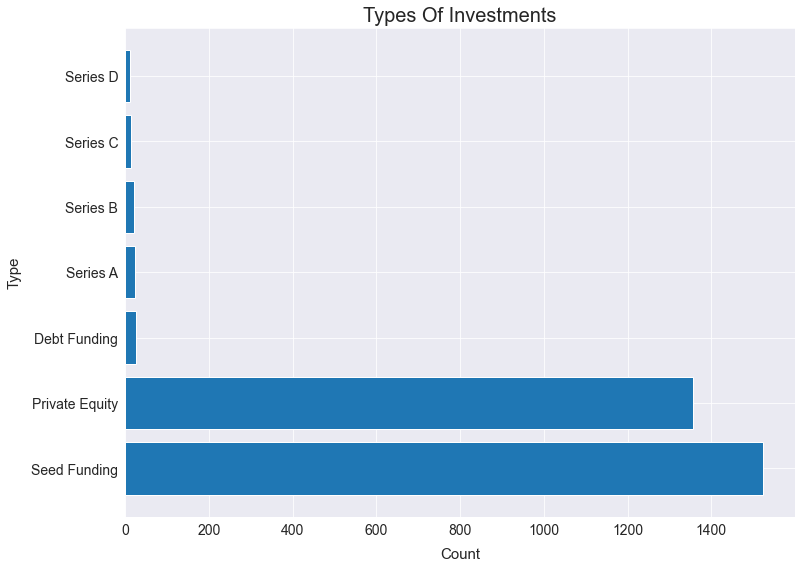

In [50]:
plt.figure(figsize=(12,9))
plt.title('Types Of Investments',fontsize=20)
plt.xlabel('Count',fontsize=15,labelpad=10)
plt.ylabel('Type',fontsize=15,labelpad=10)
plt.barh(invest_type.index,invest_type);

>**Seed funding or seed stage funding is a very early investment which aims at helping a business grow and generating its own capital. Also referred to as seed money or seed capital, investors often get equity stake in exchange for the capital invested**

>**Private Equity refers to shares of a company that represents its ownership. An individual who wants to take partial ownership of a company can make a private equity investment in that particular firm. These companies are not listed or traded on any stock exchange.**

> **[Link For Series Funding Information](https://www.startups.com/library/expert-advice/series-funding-a-b-c-d-e)**

## Inferences and Conclusion

- As we can see through the years the fundings for  the  startups is decreasing which is not so good
- Startup fundings decreased over the years but we can see that the ones who have got the fundings got large amount of fundings(volume)
- Here we can see internet market is taking half of the place because this is very broad sector that covers every startup related to internet somehow
- Technology is upgrading its sector in day by day which is great sign.
- E-commerce sector is the sector growing rapidly in India,specially Flipkart is giving tough competition to international competitor Amazon ecommerce
- Startups getting more and more seed funding which is good sign for startups as seed fundings helps them to grow and be a plant from seed.